# Notebook for feature engineering II

In [1]:
%load_ext autoreload
%autoreload 2

#Imports
import pandas as pd
import requests
import os
from tqdm.notebook import tqdm
import pickle
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  ift6758.data.data_acquisition import Season
from ift6758.visualizations.simple_visualization import Utilities 

import warnings
warnings.filterwarnings("ignore")

In [14]:
# season2015 = Season(2015,"../ift6758/data")
# season2016 = Season(2016,"../ift6758/data")
# season2017 = Season(2017,"../ift6758/data")
# season2018 = Season(2018,"../ift6758/data")
# season2019 = Season(2019,"../ift6758/data")

In [15]:
# df_2015 = season2015.clean_data()
# df_2016 = season2016.clean_data()
# df_2017 = season2017.clean_data()
# df_2018 = season2018.clean_data()
# df_2019 = season2019.clean_data()

In [16]:
from ift6758.features.feature_engineering2 import SeasonDataSetTwo
years = [2015,2016,2017,2018]
test = [2017]
data = SeasonDataSetTwo(test)

In [ ]:
df = data.get_features_2()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1299/1299 [02:57<00:00,  7.32it/s]


Len of games_list in 2017 is 1376
Saved new pickle with all events in ../ift6758/data/PICKLE//2017_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017.pkl


* Is goal (0 or 1)
* Empty Net (0 or 1; you can assume NaNs are 0)
* Game seconds
* Game period
* Coordinates (x,y, separate columns)
* Shot distance
* Shot angle
* Shot type
* Last event type
* Coordinates of the last event (x, y, separate columns)
* Time from the last event (seconds)
* Distance from the last event
* Rebound (bool): True if the last event was also a shot, otherwise False
* Change in shot angle; only include if the shot is a rebound, otherwise 0.
* “Speed”: defined as the distance from the previous event, divided by the time since the previous event. 

In [11]:
pd.set_option('display.max_columns', None)
df.head(50)

,gamePk,team.name,gamePeriod,coordinatesX,coordinatesY,shotType,emptyNet,result.strength.name,gameSeconds,shotDistance,shotAngle,isGoal,lastEventType,lastEventCoordinatesX,lastEventCoordinatesY,timeFromLastEvent,distanceFromLastEvent,rebound,speed,changeInShotAngle
0,2017020001,Winnipeg Jets,1,-36.0,-28.0,Wrist Shot,0,NaN,38.0,59.941638,-27.847578,0,Blocked Shot,55.0,-22.0,26.0,91.197588,False,3.507600,0.000000
1,2017020001,Winnipeg Jets,1,-75.0,1.0,Wrist Shot,0,NaN,49.0,14.035669,4.085617,0,Hit,-60.0,-40.0,8.0,43.657760,False,5.457220,0.000000
2,2017020001,Winnipeg Jets,1,-73.0,10.0,Backhand,0,NaN,63.0,18.867962,32.005383,0,Blocked Shot,-35.0,1.0,3.0,39.051248,False,13.017083,0.000000
3,2017020001,Toronto Maple Leafs,1,80.0,-3.0,Wrist Shot,0,NaN,106.0,9.486833,18.434949,0,Missed Shot,-33.0,-19.0,31.0,114.127122,False,3.681520,0.000000
4,2017020001,Winnipeg Jets,1,-44.0,-21.0,Snap Shot,0,NaN,222.0,49.658836,-25.016893,0,Blocked Shot,-59.0,-12.0,29.0,17.492856,False,0.603202,0.000000
5,2017020001,Winnipeg Jets,1,-38.0,-5.0,Slap Shot,0,NaN,230.0,51.244512,-5.599339,0,Shot,-44.0,-21.0,8.0,17.088007,True,2.136001,19.417554
6,2017020001,Winnipeg Jets,1,-47.0,-23.0,Slap Shot,0,NaN,270.0,47.885280,-28.705953,0,Missed Shot,-50.0,-6.0,5.0,17.262677,False,3.452535,0.000000
7,2017020001,Winnipeg Jets,1,-62.0,21.0,Wrist Shot,0,NaN,279.0,34.205263,37.874984,0,Shot,-47.0,-23.0,9.0,46.486557,True,5.165173,66.580936
8,2017020001,Winnipeg Jets,1,-36.0,-18.0,Wrist Shot,0,NaN,289.0,55.973208,-18.758650,0,Shot,-62.0,21.0,10.0,46.872167,True,4.687217,56.633634
9,2017020001,Toronto Maple Leafs,1,60.0,7.0,Snap Shot,0,NaN,311.0,29.832868,-13.570434,0,Hit,-96.0,-7.0,8.0,156.626945,False,19.578368,0.000000


In [7]:
df['result.strength.name'].unique() , df['gamePk'].count() 

(array([nan, 'Power Play', 'Even', 'Short Handed'], dtype=object), 173076)

<AxesSubplot:xlabel='shotType', ylabel='count'>

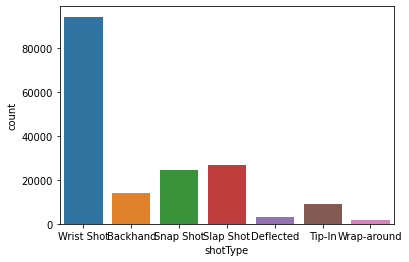

In [8]:
sns.countplot(x='shotType',data=df)

## I try the bonus 

In [9]:
df[['gamePk','team.name','result.strength.name', 'gameSeconds', 'timeFromLastEvent']].head(60)

,gamePk,team.name,result.strength.name,gameSeconds,timeFromLastEvent
0,2017020001,Winnipeg Jets,NaN,38.0,26.0
1,2017020001,Winnipeg Jets,NaN,49.0,8.0
2,2017020001,Winnipeg Jets,NaN,63.0,3.0
3,2017020001,Toronto Maple Leafs,NaN,106.0,31.0
4,2017020001,Winnipeg Jets,NaN,222.0,29.0
5,2017020001,Winnipeg Jets,NaN,230.0,8.0
6,2017020001,Winnipeg Jets,NaN,270.0,5.0
7,2017020001,Winnipeg Jets,NaN,279.0,9.0
8,2017020001,Winnipeg Jets,NaN,289.0,10.0
9,2017020001,Toronto Maple Leafs,NaN,311.0,8.0


In [10]:
#fctn to finish
def get_strength_features(df_i):
    
    df = df_i.copy()
    
    #Initialize PowerPlayTime to 0
    df['PowerPlayTime'] = pd.to_timedelta(0)
    df['PowerPlayTime'] = df['PowerPlayTime'].dt.total_seconds()
    
    #Initialize number of friendly/non-friendly skaters to 5
    df['friendlySkater'] = 5
    df['nonFriendlySkater'] = 5
    #loop for all game
    for i in df['gamePk'].unique() : 
        #loop for all game event
        for j in df[df['gamePk']==i].index
            if df['result.strength.name'].iloc[j]=='Power Play':
                #do smth
                pass
            elif df['result.strength.name'].iloc[j]=='Even':
                #do another thing
                pass
            elif df['result.strength.name'].iloc[j]=='Short Handed':
                #do smth else
                pass
    return df
            

SyntaxError: invalid syntax (2364091038.py, line 16)

In [11]:
df[df['gamePk']==2017020001]

,gamePk,team.name,gamePeriod,coordinatesX,coordinatesY,shotType,emptyNet,result.strength.name,gameSeconds,shotDistance,shotAngle,isGoal,lastEventType,lastEventCoordinatesX,lastEventCoordinatesY,timeFromLastEvent,distanceFromLastEvent,rebound,speed,changeInShotAngle
0,2017020001,Winnipeg Jets,1,-36.0,-28.0,Wrist Shot,0,NaN,38.0,59.941638,-27.847578,0,Blocked Shot,55.0,-22.0,26.0,91.197588,False,3.507600,0.0
1,2017020001,Winnipeg Jets,1,-75.0,1.0,Wrist Shot,0,NaN,49.0,14.035669,4.085617,0,Hit,-60.0,-40.0,8.0,43.657760,False,5.457220,0.0
2,2017020001,Winnipeg Jets,1,-73.0,10.0,Backhand,0,NaN,63.0,18.867962,32.005383,0,Blocked Shot,-35.0,1.0,3.0,39.051248,False,13.017083,0.0
3,2017020001,Toronto Maple Leafs,1,80.0,-3.0,Wrist Shot,0,NaN,106.0,9.486833,18.434949,0,Missed Shot,-33.0,-19.0,31.0,114.127122,False,3.681520,0.0
4,2017020001,Winnipeg Jets,1,-44.0,-21.0,Snap Shot,0,NaN,222.0,49.658836,-25.016893,0,Blocked Shot,-59.0,-12.0,29.0,17.492856,False,0.603202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2017020001,Toronto Maple Leafs,3,84.0,-3.0,Tip-In,False,Even,717.0,5.830952,30.963757,1,Faceoff,0.0,0.0,26.0,84.053554,False,3.232829,0.0
64,2017020001,Winnipeg Jets,3,-80.0,1.0,Wrist Shot,False,Even,777.0,9.055385,6.340192,1,Giveaway,-95.0,26.0,3.0,29.154759,False,9.718253,0.0
65,2017020001,Winnipeg Jets,3,-66.0,8.0,Wrist Shot,0,NaN,835.0,24.351591,19.179008,0,Faceoff,-20.0,-22.0,28.0,54.918121,False,1.961361,0.0
66,2017020001,Toronto Maple Leafs,3,83.0,-28.0,Backhand,0,NaN,952.0,28.635642,77.905243,0,Faceoff,-20.0,-22.0,18.0,103.174609,False,5.731923,0.0


In [12]:
df_test = df.copy()
df_test['PowerPlayTime'] = pd.to_timedelta(0)
df_test['PowerPlayTime'] = df_test['PowerPlayTime'].dt.total_seconds()

In [13]:
df_test['PowerPlayTime']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
173071    0.0
173072    0.0
173073    0.0
173074    0.0
173075    0.0
Name: PowerPlayTime, Length: 173076, dtype: float64

## Put the bonus aside, comet ML part here

In [16]:
from ift6758.features.feature_engineering2 import SeasonDataSetTwo
years = [2017]
data = SeasonDataSetTwo(years)

In [17]:
df = data.get_features_2()

File with all events already Exists, loading from ../ift6758/data/PICKLE//2017_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl


In [19]:
pd.set_option('display.max_columns', None)


In [20]:
df.head(4)

,gamePk,team.name,gamePeriod,coordinatesX,coordinatesY,shotType,emptyNet,isHome,gameSeconds,totalGameSeconds,shotDistance,shotAngle,isGoal,lastEventType,lastEventCoordinatesX,lastEventCoordinatesY,timeFromLastEvent,distanceFromLastEvent,rebound,speed,changeInShotAngle,angleSpeed
0,2017020001,Winnipeg Jets,1,-36.0,-28.0,Wrist Shot,0,True,38.0,38.0,59.941638,-27.847578,0,Blocked Shot,55.0,-22.0,26.0,91.197588,False,3.507600,0.0,0.0
1,2017020001,Winnipeg Jets,1,-75.0,1.0,Wrist Shot,0,True,49.0,49.0,14.035669,4.085617,0,Hit,-60.0,-40.0,8.0,43.657760,False,5.457220,0.0,0.0
2,2017020001,Winnipeg Jets,1,-73.0,10.0,Backhand,0,True,63.0,63.0,18.867962,32.005383,0,Blocked Shot,-35.0,1.0,3.0,39.051248,False,13.017083,0.0,0.0
3,2017020001,Toronto Maple Leafs,1,80.0,-3.0,Wrist Shot,0,False,106.0,106.0,9.486833,18.434949,0,Missed Shot,-33.0,-19.0,31.0,114.127122,False,3.681520,0.0,0.0


In [23]:
subset_df = df[df['gamePk']==2017021065].drop(["gamePk","team.name","emptyNet"],axis=1)
subset_df.head(5)

,gamePeriod,coordinatesX,coordinatesY,shotType,isHome,gameSeconds,totalGameSeconds,shotDistance,shotAngle,isGoal,lastEventType,lastEventCoordinatesX,lastEventCoordinatesY,timeFromLastEvent,distanceFromLastEvent,rebound,speed,changeInShotAngle,angleSpeed
68667,1,-50.0,36.0,Snap Shot,True,111.0,111.0,53.075418,42.709390,0,Hit,72.0,37.0,11.0,122.004098,False,11.091282,0.000000,0.000000
68668,1,-85.0,-25.0,Wrist Shot,True,115.0,115.0,25.317978,-80.909723,0,Shot,-50.0,36.0,4.0,70.327804,True,17.581951,123.619113,30.904778
68669,1,73.0,-16.0,Backhand,False,124.0,124.0,22.627417,45.000000,0,Takeaway,-39.0,-28.0,1.0,112.641023,False,112.641023,0.000000,0.000000
68670,1,-29.0,-6.0,Slap Shot,True,151.0,151.0,60.299254,-5.710593,0,Hit,10.0,38.0,5.0,58.796258,False,11.759252,0.000000,0.000000
68671,1,23.0,-34.0,Wrist Shot,False,159.0,159.0,74.242845,27.255328,0,Shot,-29.0,-6.0,8.0,59.059292,True,7.382412,32.965922,4.120740


In [24]:
import os
from comet_ml import Experiment

'COMET_API_KEY' in os.environ

True

In [25]:
experiment = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name='feature_engineering_data',
    workspace='morph-e',
)



COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/morph-e/feature-engineering-data/9d89117fa9e745599ce09ec5dcda3c0f



In [26]:
experiment.log_dataframe_profile(
subset_df, 
name='wpg_v_wsh_2017021065',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


{'profile': {'web': 'https://www.comet.ml/api/asset/download?assetId=7d0ee77495054a628bd5960103ffd23a&experimentKey=9d89117fa9e745599ce09ec5dcda3c0f',
  'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=7d0ee77495054a628bd5960103ffd23a&experimentKey=9d89117fa9e745599ce09ec5dcda3c0f',
  'assetId': '7d0ee77495054a628bd5960103ffd23a'},
 'dataframe': {'web': 'https://www.comet.ml/api/asset/download?assetId=01e0a2fc17464946b8949150cef6c8b4&experimentKey=9d89117fa9e745599ce09ec5dcda3c0f',
  'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=01e0a2fc17464946b8949150cef6c8b4&experimentKey=9d89117fa9e745599ce09ec5dcda3c0f',
  'assetId': '01e0a2fc17464946b8949150cef6c8b4'}}

In [15]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/morph-e/feature-engineering-data/dea0387cefee43a39de39c8e0b5ee268
COMET INFO:   Uploads:
COMET INFO:     dataframe                : 1 (14.32 KB)
COMET INFO:     dataframe-profile        : 1 (6.23 MB)
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (661.81 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading 1 metrics, params and output messages
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to 